- Dataset 1 (`spotify_dataset_0.csv`) is used for mood detection and audio feature analysis.
- Dataset 2 (`spotify_dataset_1.csv`) is used to provide playlist-level contextual information.

# Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler

In [47]:
import os
os.chdir("..")
print("Working directory:", os.getcwd())

Working directory: /Users/srs/Desktop/REGIS/MSDS692- DATA SCIENCE PRACTICUM/practicum_1_mood_detection_using_music_recommendation_system


In [14]:
plt.rcParams["figure.figsize"] = (9, 5)

RAW_DIR = "data/raw"
PROCESSED_DIR = "data/processed"
FIG_DIR = "reports/figures"

os.makedirs(PROCESSED_DIR, exist_ok=True)
os.makedirs(FIG_DIR, exist_ok=True)

In [21]:
df0 = pd.read_csv("../data/raw/spotify_dataset_0.csv")
df1 = pd.read_csv("../data/raw/spotify_dataset_1.csv")

df0.shape, df1.shape

((114000, 21), (32833, 23))

In [22]:
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [24]:
df0.columns = df0.columns.str.lower()
df1.columns = df1.columns.str.lower()

In [25]:
rename_map = {
    "danceability": "danceability",
    "energy": "energy",
    "loudness": "loudness",
    "speechiness": "speechiness",
    "acousticness": "acousticness",
    "instrumentalness": "instrumentalness",
    "liveness": "liveness",
    "valence": "valence",
    "tempo": "tempo"
}
df0 = df0.rename(columns=rename_map)

In [26]:
if "duration_min" in df0.columns:
    df0["duration_ms"] = df0["duration_min"] * 60 * 1000

In [27]:
audio_features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "duration_ms"
]

df0_audio = df0[audio_features].dropna()
df1_audio = df1[audio_features].dropna()

In [28]:
df0_audio["source_dataset"] = "spotify_dataset_0"
df1_audio["source_dataset"] = "spotify_dataset_1"

In [29]:
df_combined = pd.concat([df1_audio, df0_audio], ignore_index=True)
print("Combined shape:", df_combined.shape)
df_combined.head()

Combined shape: (146833, 11)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,source_dataset
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,spotify_dataset_1
1,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,spotify_dataset_1
2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,spotify_dataset_1
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,spotify_dataset_1
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,spotify_dataset_1


# EDA


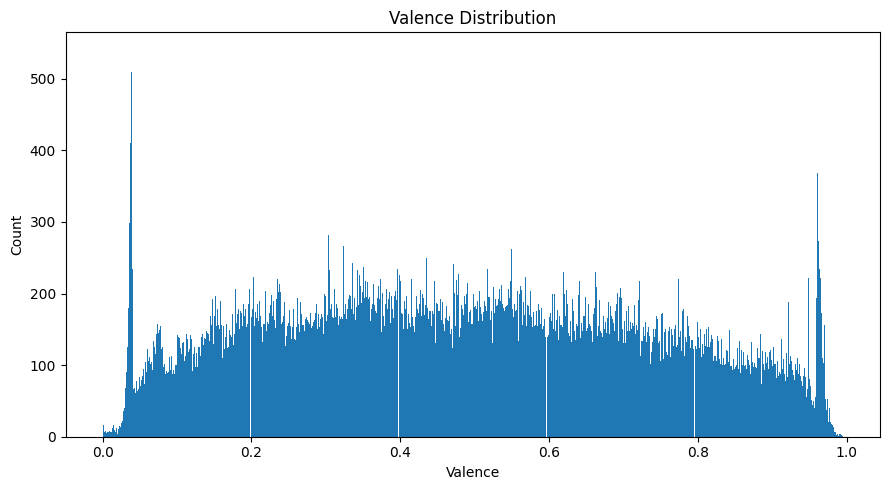

In [42]:
plt.hist(df_combined["valence"], bins=1000)
plt.title("Valence Distribution")
plt.xlabel("Valence")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "valence_distribution.png"), dpi=200)
plt.show()

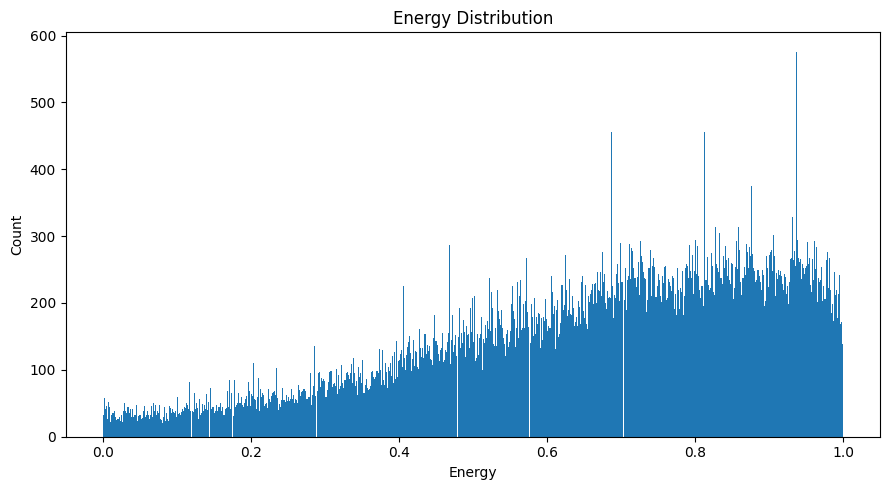

In [37]:
plt.hist(df_combined["energy"], bins=1000)
plt.title("Energy Distribution")
plt.xlabel("Energy")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "energy_distribution.png"), dpi=200)
plt.show()

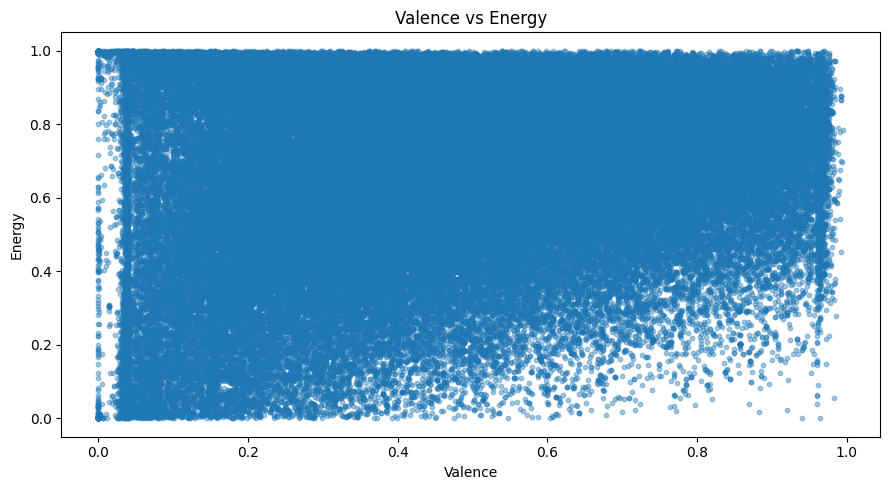

In [40]:
plt.scatter(df_combined["valence"], df_combined["energy"], s=8, alpha=0.4)
plt.xlabel("Valence")
plt.ylabel("Energy")
plt.title("Valence vs Energy")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "valence_vs_energy.png"), dpi=200)
plt.show()

# FEATURE SCALING

In [43]:
mood_features = ["valence", "energy", "danceability", "tempo", "loudness"]

scaler = StandardScaler()
df_scaled = df_combined.copy()
df_scaled[mood_features] = scaler.fit_transform(df_scaled[mood_features])

In [45]:
df_combined = pd.concat([df1_audio, df0_audio], ignore_index=True)
print("Combined shape:", df_combined.shape)
df_combined.head()

Combined shape: (146833, 11)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,source_dataset
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,spotify_dataset_1
1,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,spotify_dataset_1
2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,spotify_dataset_1
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,spotify_dataset_1
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,spotify_dataset_1


In [46]:
df_scaled.to_csv(
    os.path.join(PROCESSED_DIR, "spotify_combined_audio_features.csv"),
    index=False
)